# FUNDAMENTOS DE SISTEMAS COMPUTACIONAIS

# Aula 01 ---------------------------------------- \#

*Arquitetura*:

Refere-se a atributos do sistema que são visíveis ao programador (assembly).

    e.g.: endereçamento de memória, conjunto de instruções.

*Organização*:

Refere-se à unidades operacionais do computador e interconexões entre as mesmas.

    e.g.: sinais de controle, tecnologias de memória.

Componentes básicos:

CPU, Memória principal e módulo de I/O de periféricos:

<img src="_/1.png" style="width: 400px;"/>

Execução de programas, é feita em ciclos:

- 1- O processador busca da memória a (próxima) instrução cujo endereço está no `PC`;
- 2- A instrução é carregada no `IR`;
- 3- O processador decodifica a instrução

A instrução (decodificada) executada pode ser:

- 1- Transferência de dados entre processador e memória;
- 2- Transferência de dados entre periféricos e processador;
- 3- Execução de operações lógicas e aritiméticas sobre os dados;
- 4- Alterações na sequência de execução das instruções

Ciclo de instruções (6 erstágios):

- 1- `IAC`: Determina o endereço da próxima instrução;
- 2- `IF`: Carrega a instrução no processador;
- 3- `ID`: Determina o tipo de instrução e os operandos necessários;
- 4- `OF`: Busca o operando; 
- 5- `DO`: Executa a operação;
- 6- `OS`: Escreve o resultado

<img src="_/2.png" style="width: 400px;"/>

No caso da execução sequencial, o endereço da próxima instrução é obtido através de uma operação de soma (add) no `PC`. Infelizmente, em geral, a execução não é estritamente sequencial. Em alguns pontos do código, dicisões são tomadas que fazem com o que caminhos alternativos sejam seguidos. _ifs_ e _loops_ são exemplos dessas decisões; são taduzidos das linguagens de alto nível para *desvios* em assembly. As instruçõesd e máquina que implementam esses desvios são _banches_ ou _jumps_.

e.g.:

<img src="_/3.png" style="width: 400px;"/>


    ac0: 10
    ac1: 943
    ac2: 943
    ac3: 0

    #940 = 1
    #941 = 3
    #942 = 6
    #943 = 10

## [Lista 1]

1)

a) Arquitetural. É um atribudo do sistema com o qual o programador irá interagir.

b) Organizacional. Lida diretamente com o componente, sendo transparente para o programador.

c) Arquitetural. É uma característica visível para o programador.

2)
```python
a[1] = 1
a[2] = 2
a[3] = 3
a[4] = 4
para i=1 até 3, faça:
    a[i+1] = a[i+1] + a[i]
```

3) Complica. Não havendo desvios, o `PC` sempre receberá o valor atual incrementado de 1. Com isso, por exemplo, é fácil saber qual foi a instrução anterior e qual será a próxima, sem precisar conhecer o código a ser executado.

4) Determinar o que a instrução faz e quais são seus operandos.

# Aula 02 ---------------------------------------- \#

Pipelining:

Permite que a execução de múltiplas instruções seja sobreposta. A execução de uma instrução é dividida em estágios. Uma instruçao não é executada mais rápido, porém o programa como um todo, sim (maior _throughput_). A enorme maioria dos processadores atuais conta com esse recurso.

Decomposição de execução em estágios (e.g.: DLX):

- `IF`: Busca a instrução da memória e carrega no `IR`;
- `ID`: Decodifica a instrução e acessa registradores;
- `EX`: Executa operações;
- `Mem`: Executa _loads_, _stores_ e _branches_;
- `WB`: Escreve os valores nos registradores ou na memória

 `IF`:
 

<img src="_/4.png" style="width: 400px;"/>


 `ID`:

<img src="_/5.png" style="width: 400px;"/>


 `EX`:
 
<img src="_/6.png" style="width: 400px;"/>


 `Mem`:
 
<!-- <img src="_/7.png" style="width: 400px;"/> -->
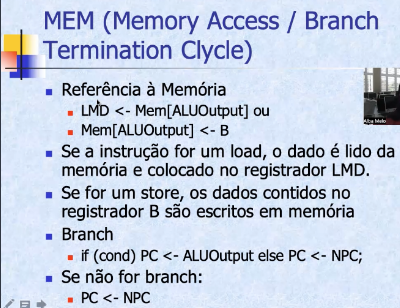



 `WB`:
 

<img src="_/8.png" style="width: 400px;"/>


e.g.:

<img src="_/9.png" style="width: 400px;"/>
<img src="_/10.png" style="width: 400px;"/>
<img src="_/11.png" style="width: 400px;"/>
<img src="_/12.png" style="width: 400px;"/>
<img src="_/13.png" style="width: 400px;"/>
<img src="_/14.png" style="width: 400px;"/>
<img src="_/15.png" style="width: 400px;"/>


<img src="_/16.png" style="width: 400px;"/>

*Pipeline ideal*: Todo estágio se completa em um ciclo de clock.

Não podem haver estágios semelhantes sobrepostos no mesmo ciclo de clock, causaria confusão.

Executar o pipeline para 5 instruções com o EX demorando 2 ciclos:

    instrução/ciclo  1  2  3  4  5  6  7  8  9  10  11  12  13  14
    instrução 1      IF  ID  EX  EX  MEM  WD                
    Instrução 2         IF  ID  --  EX  EX  MEM  WD            
    Instrução 3            IF  ID  --  --  EX  EX  MEM  WD        
    Instrução 4               IF  ID  --  --  --  EX  EX  MEM  WD    
    Instrução 5                  IF  ID  --  --  --  --  EX  EX  MEM  WD

<img src="_/17.png" style="width: 400px;"/>

Perceba que o número de ciclos é dado por:

$Nciclos(i) = Nciclos_{instruc_{1}} + ((i + 1) * max_{atraso})$

Desbalanceamento: O estágio mais lento do pipeline limita o seu desempenho.

Estágios `EX` que incluem operações de ponto flutuante não se completam em um ciclo de clock.

Para a implementação do pipeline, overhead é adicionado por registradores de pipeline (_latches_). Os dados e controles necessários são passados de um estágio para outro através de latches.

<img src="_/18.png" style="width: 400px;"/>

Hazards:

É uma propriedade um pipeline. São a maior fonte de limitação do pipeline. Situações que impedem que o próximo estágio seja executado no próximo ciclo de clock. Os hazerds fazem com que o pipeline seja atrasado (stall).

Classes de hazards:

- Estrutural: O hardware não é capaz de executar este passo de maneira sobreposta com outros passos que já estão no pipeline;
- Dados: Uma instrução depende do resultado de uma instrução anterior que ainda não foi produzido;
- Controle: Causados por desvios.

Hazard estrutural:

A execução sobreposta de instruções existe que as demais unidades funcionais sejam _pipelined_ e que haja duplicação de recursos de modo a permintir que qualquer combinação de instruções no pipeline. Quando isso acontece, ocorre um hazard estrutural e o pipeline é atrasado. Este atraso é feito pela inserção de ciclos de stall (_pipeline bubles_).

Motivos:

- Algumas unidades funcionais não foram totalmente pipelined;
- Recursos não foram replicados de maneira suficiente:
    - Neste caso, ocorre o conflito pela utilização de recursos;
    - Exemplo de recursos: registradores, paths, portas para acesso à memória
- Se a situação não for frequente, talvez o overhead e o custo introduzido não sejam compensados.

e.g.:

<img src="_/19.png" style="width: 400px;"/>

# Aula 03 ---------------------------------------- \#

Hazard de dados:

Ocorre porque o pipelining pode modificar a ordem dos acessos aos operandos.

e.g.:

<img src="_/20.png" style="width: 400px;"/>
<img src="_/21.png" style="width: 400px;"/>

Tipos de dependências entre as instruções:

- `RAW`: read after write
- `WAW`: write after write
- `WAR`: write after read

O _Fowarding_ (_bypassing_ ou _shortcutting_) é uma técnica de **hardware** para solucionar alguns hazard de dados. Efetuando a transferência direta para a unidade funcional que requer o dado.

Em alguns casos o fowarding não é suficiente, pois o dado pode ser necessário em um estágio da instrução $i + 1$ quando ainda não foi produzido pela instrução $i$. Geralmente, os loads são causadores desse tipo de hazard.

Pipeline interlock: hardware que detecta o hazard e atrasa o pipeline, através da introdução de bubles, até que a execução possa continuar:

<img src="_/22.png" style="width: 400px;"/>
<img src="_/23.png" style="width: 400px;"/>

Pipeline Scheduling: Técnica utilizada pelo compilador para reduzir o número de stalls. O compilador pode, ao gerar o código, tentar evitar certos padrões (e.g.: evitar colocar o load em um registrador muito próximo da instrução que usa este registrador).

<img src="_/24.png" style="width: 400px;"/>

Bloco básico: Sequência de instruções onde não há desvios e nem transferências de I/O. Num bloco básico, todas as instruções são executadas, caso a primeira seja. Uma técnica simples consiste em dividir o programa em blocos básicos e escalonar as instruções dentro de cada bloco.

Hazard de conrole:

Mudanças no fluxo da execução que vão acontecer:
- Branches (IF, loops)
- Jumps (GOTO)
- Procedure calls
- Procedure returns

Quando uma instrução de desvio muda o `PC`, diz-se que o desvio foi tomado (branch taken). Se a instrução $i$ for um desvio tomado, o novo endereço do `PC` somente será conhecido no final do estágio `Mem`:

<img src="_/25.png" style="width: 400px;"/>

O número de ciclos de clock atrasados por causa de uma brancho pode ser reduzido com duas técnicas combinadas:

- 1- Descobrir, mais cedo, se o branch é tomado ou não;
- 2- Calcular o novo valor `PC` antes

Geralmente os branches são decididos através de uma comparação de um registrador com o valor zero. Pode-se, então, mover estre teste para o estágio `ID` através da inclusão de um adicionador e do teste de branch neste estágio. Neste caso, temos somente um ciclo de atraso (stall).

!<img src="_/26.png" style="width: 400px;"/>

Técnica #1: Previsão "Not Taken"

    Todos os branches são tratados como not taken e o pipeline é carregado com as instruções que imediatamente seguem o branch. O estado da máquina não pode ser alterado até que o resultado do desvio seja conhecido e, caso o desvio seja tomado, as eventuais mudanças devem ser desfeitas (back out).

<img src="_/27.png" style="width: 400px;"/>

Técnica #2: Previsão "Taken"

    Logo que a instrução de branch for decodificada e o alvo da branch for conhecido, começa-se a buscar instruções a partir do alvo. Em muitas arquiteturas, não se conhece o alvo da branch antes de se executar o branch. Para estas arquiteturas, este esquema não é efetivo.

Técnica #3: Delayed Branch

<img src="_/28.png" style="width: 400px;"/>

    As instruções contidas no branch delay slot são executadas independente do resultado do branch (taken ou not taken). A grande maioria das máquinas que usam esta técnica tem 01 delay slot. O compilador faz um papel fundamental nesta ténica, pois faz o escalonamento de instruções.

- From Before:
<img src="_/29.png" style="width: 400px;"/>

- From Target:
<img src="_/30.png" style="width: 400px;"/>

- From Fall through:
<img src="_/31.png" style="width: 400px;"/>

    Muitas vezes, essa técnica não pode ser utilizada devido a:
        - Restrições das próprias instruções que deverão ser escalonadas no delay slot (e.g.: dependências, branches); incapacidade de prever, em tempo de compilação, se um desvio será executado ou não.

- Cancelling Branches:

    Um cancelling branch contém a previsão daquele desvio. Se a previsão for correta, o delay slot é executado; caso seja incorreta, o delay slot é transformado em `no-op`. Elimina restrições sobre a instrução a ser colocada no delay slot.


Atualmente, o hardware é responsável pela predição de desvios, então o compilador passou a não fazer mais essa tarefa.

Medidas básicas de desempenho:

- Tempo médio de execução de instrução (AIT):

    $AIT = cicloDeClock * CPI_{média}$

- Speedup do pipeline:

    $S = \frac{AIT_{semPipeline}}{AIT_{comPipeline}}$

- Tempo total de execução de $n$ instruções com um pipeline de $k$ estágios:

    $T_k = k + [(n - 1) * máximoAtrasoDoEstágio]$

Barramentos:

É um meio de transmissão compartilhado que vai conectar vários dispositivos. Possui varias linhas:
- Dados: Cada linha transporta 01 bit por vez
- Endereço: Recebe o endereço da palavra a ser acessada
- Controle: Controlam o uso das linhas

<img src="_/32.png" style="width: 400px;"/>

Algumas linhas de controle: Memory write, Memory read, Transfer ACK, Bus request, Bus grant, Clock (barramentos síncronos), Reset.

Arquiteturas de barramentos:

<img src="_/33.png" style="width: 400px;"/>

A velocidade do barramento é limitada pelo:
- Tamanho (físico) do barramento;
- Números de dispositivos conectados

Barramentos CPU-Memória: Pequenos e de alta velocidade.

Barramentos de I/O: Maiores e devem acomodar diversos tipos de dispositivos, seguindo um padrão.

- Leitura de dados na memória: O endereço e os sinais de controle indicando uma leitura são enviados no barramento (read e wait); a memória coloa o dado no barramento e retira (deasserts) o sinal de wait.

- Escrita de dados na memória: A CPU coloca o endereço e o dado no barramento; A memória retira o dado e o seu endereço e faz a atualização; geralmente, a CPU não espera confirmação.

Bus Masters: São dispositivos que podem iniciar transações no barramento. A CPU é sempre bus master.

    Sistemas com vários Bus Masters:
    - Várias CPUs e dispositivos de I/O específicos;
    - Necessitam de um esquema de arbitragem para resolver conflitos, geralmente com prioridade fixa ou randômica.

Split transacion (pipelined ou packet-switched) buses:

- As transições no barramento são divididas em etapas, não blocantes;

e.g.: Uma transação read pode ser dividida em: Read-request e Memory-reply

- A memória necessita participar da arbitragem
- As transações possuem tags para serem identificadas


Barramentos síncronos:
- Uma das linhas de controle é um clock;
- Os protocolos para endereço e dados são fixos e baseados neste clock;
- Sào rápidos e baratos, porém, devido a distorções de clock (clock skew), não podem ser longos;
- Os barramentos CPU-Memória costumam ser síncronos

Barramentos **a**ssíncronos:
- Usam protocolos de handhsaking entre emissor e receptor;
- Adicionam um overhead para sincronizar cada transaçao, se tornando mais lentos;
- Permitem que mais tipos de dispositivos sejam conectados;
- São geralmente utilizado em I/O buses


## [Lista 2]

# Aula 04 ---------------------------------------- \#